In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [93]:
df=pd.read_csv("Fraud (1).csv")
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [95]:
df["isFraud"].value_counts()
df["isFlaggedFraud"].value_counts()
df.isnull().sum().sum()
df.shape[0]

6362620

In [97]:
round(df["isFraud"].value_counts()[1] / df.shape[0] *100,1)

0.1

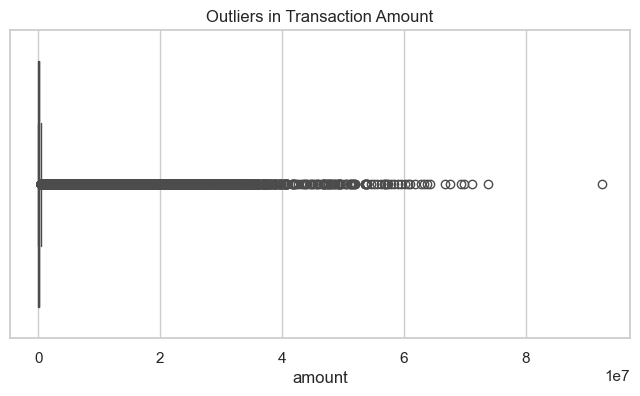

In [99]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['amount'])
plt.title("Outliers in Transaction Amount")
plt.show()

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn. compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [143]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [145]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [147]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [149]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig", "oldbalanceDest","newbalanceDest"]

In [151]:
y = df_model["isFraud"]
X = df_model.drop("isFraud",axis = 1)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [155]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
        ],   
        remainder= "drop"
)

In [157]:
pipeline = Pipeline([      
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=1000))
])



In [159]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [160]:
y_pred = pipeline.predict(X_test)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



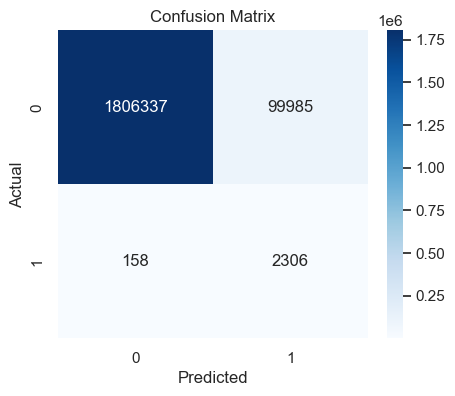

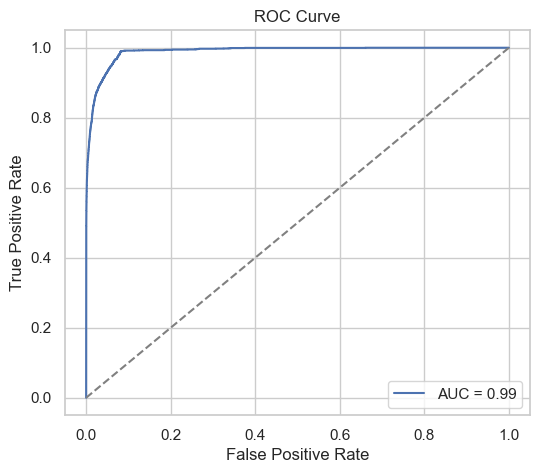

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [177]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = pipeline.predict(X_test)

y_proba = pipeline.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(classification_report(y_test, y_pred))


In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])
vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif

,feature,VIF
0,const,1.249912
1,amount,3.704164
2,oldbalanceOrg,430.052765
3,newbalanceOrig,431.093970
4,oldbalanceDest,64.982048
5,newbalanceDest,74.887727


In [188]:
pipeline.score(X_test,y_test)*100

94.75357635690958

In [189]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']